## Visualizaion of Data 

##### Importing the right tools for the job 


In [3]:
import pandas as pd
import matplotlib.pyplot as plt


In [11]:
df = pd.read_csv('GDP (4).csv')


In [12]:
df

DATE        GDP
0    1947-01-01    243.164
1    1947-04-01    245.968
2    1947-07-01    249.585
3    1947-10-01    259.745
4    1948-01-01    265.742
..          ...        ...
301  2022-04-01  25248.476
302  2022-07-01  25723.941
303  2022-10-01  26137.992
304  2023-01-01  26529.774
305  2023-04-01  26798.605

[306 rows x 2 columns]

###### Cleaning the Data for the 'Date' Column - 

In [15]:
df['DATE'] = pd.to_datetime(df['DATE'])

df['Year'] = df['DATE'].dt.year

print(df.head())

        DATE      GDP  Year
0 1947-01-01  243.164  1947
1 1947-04-01  245.968  1947
2 1947-07-01  249.585  1947
3 1947-10-01  259.745  1947
4 1948-01-01  265.742  1948


In [17]:
df

DATE        GDP  Year
0   1947-01-01    243.164  1947
1   1947-04-01    245.968  1947
2   1947-07-01    249.585  1947
3   1947-10-01    259.745  1947
4   1948-01-01    265.742  1948
..         ...        ...   ...
301 2022-04-01  25248.476  2022
302 2022-07-01  25723.941  2022
303 2022-10-01  26137.992  2022
304 2023-01-01  26529.774  2023
305 2023-04-01  26798.605  2023

[306 rows x 3 columns]

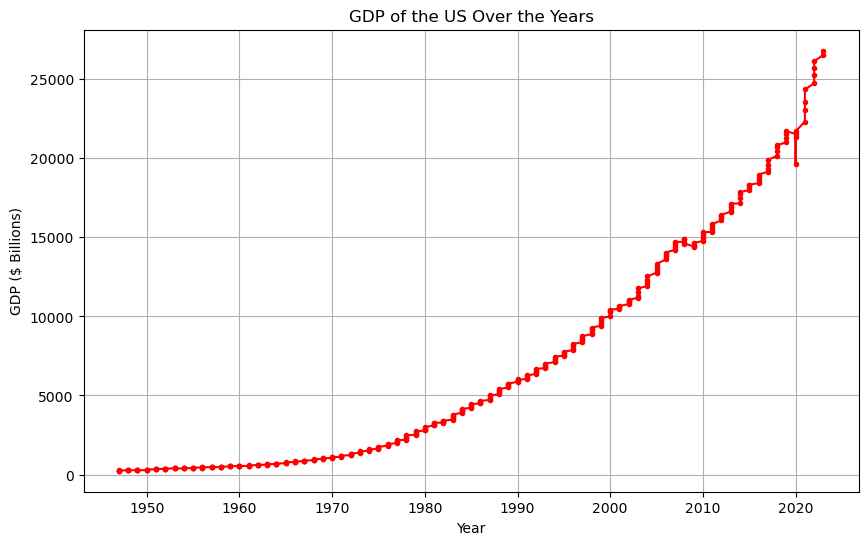

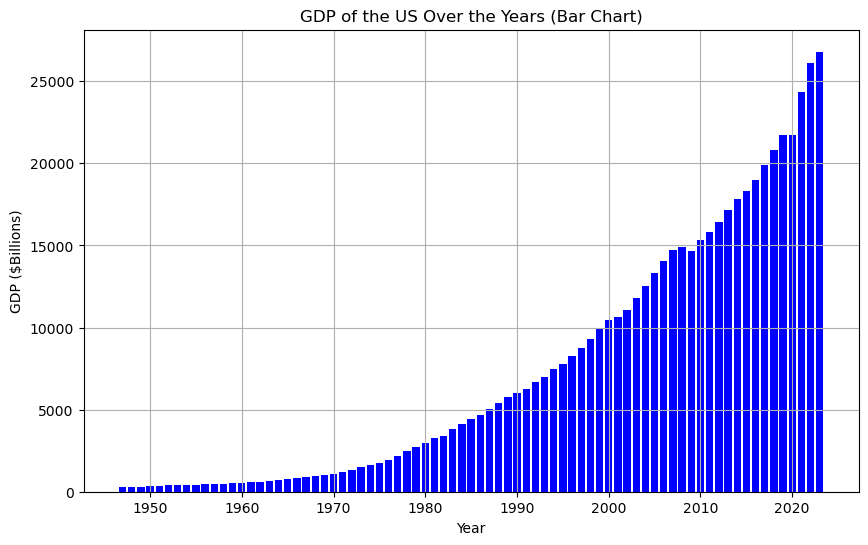

In [41]:
import pandas as pd
import matplotlib.pyplot as plt


# Plotting
plt.figure(figsize=(10, 6))  # Set the figure size (width, height)

# Plotting the data
plt.plot(df['Year'], df['GDP'], marker='o', color='r', linestyle='-',markersize=3)

# Adding labels and title
plt.title('GDP of the US Over the Years')
plt.xlabel('Year')
plt.ylabel('GDP ($ Billions)')
plt.grid(True)
# Bar Chart
plt.figure(figsize=(10, 6))
plt.bar(df['Year'], df['GDP'], color='blue')
plt.xlabel('Year')
plt.ylabel('GDP ($Billions)')
plt.title('GDP of the US Over the Years (Bar Chart)')
plt.grid(True)
plt.show()





# Displaying grid

# Show the plot
plt.show()



In [58]:
df_in = pd.read_csv('united-states-inflation-rate-cpi.csv')

In [63]:
df_in['date'] = pd.to_datetime(df_in['date'])

df_in['new'] = df_in['date'].dt.year
df.dropna()
print(df_in.head())

        date   Inflation Rate   Annual Change   new
0 1960-12-31           1.4580             NaN  1960
1 1961-12-31           1.0707           -0.39  1961
2 1962-12-31           1.1988            0.13  1962
3 1963-12-31           1.2397            0.04  1963
4 1964-12-31           1.2789            0.04  1964


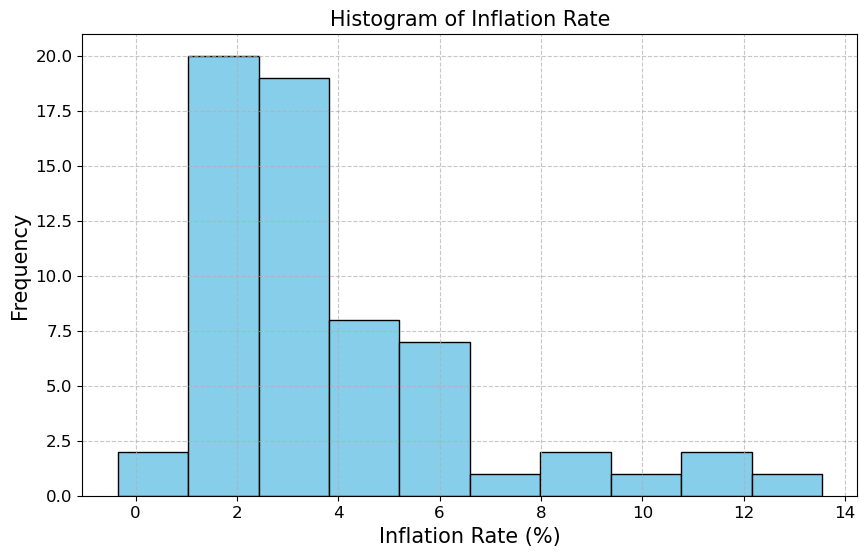

In [66]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.hist(df_in[' Inflation Rate'], bins=10, color='skyblue', edgecolor='black')
plt.title('Histogram of Inflation Rate', fontsize=15)
plt.xlabel('Inflation Rate (%)', fontsize=15)
plt.ylabel('Frequency', fontsize=15)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.grid(True, linestyle='--', alpha=0.7)
plt.show()


In [61]:
df_in['date'] = pd.to_datetime(df_in['date'])

df_in['new'] = df_in['date'].dt.year

print(df_in.head())

        date   Inflation Rate   Annual Change   new
0 1960-12-31           1.4580             NaN  1960
1 1961-12-31           1.0707           -0.39  1961
2 1962-12-31           1.1988            0.13  1962
3 1963-12-31           1.2397            0.04  1963
4 1964-12-31           1.2789            0.04  1964


In [76]:
print(df_in.columns)



Index(['date', ' Inflation Rate', ' Annual Change', 'new'], dtype='object')


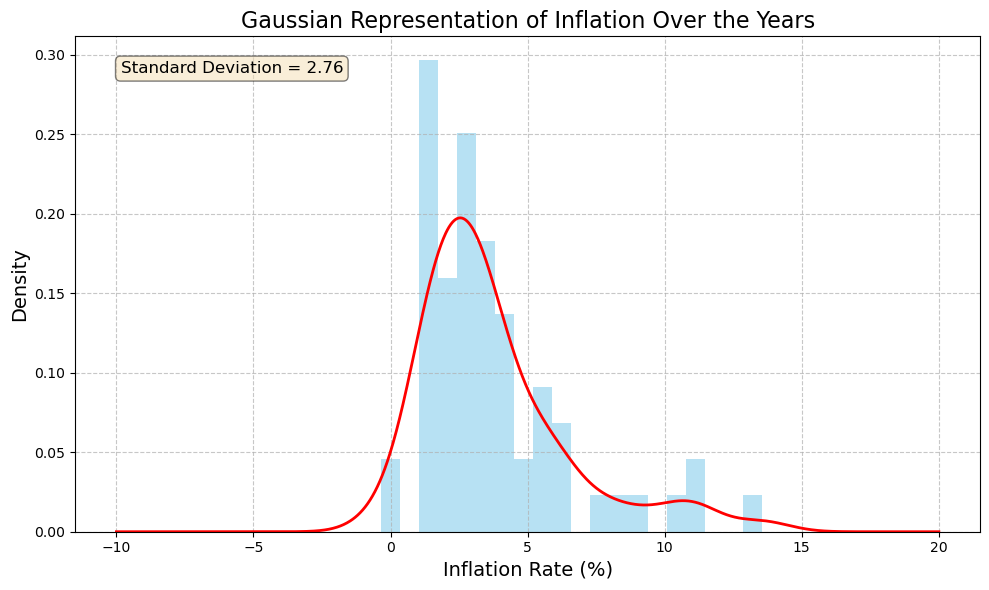

In [79]:
import numpy as np
from scipy.stats import norm
from sklearn.neighbors import KernelDensity


inflation_data = df_in[' Inflation Rate'].dropna().values.reshape(-1, 1)

kde = KernelDensity(bandwidth=1.0, kernel='gaussian')
kde.fit(inflation_data)

x = np.linspace(-10, 20, 1000).reshape(-1, 1)
log_dens = kde.score_samples(x)

mean_inflation = np.mean(inflation_data)
std_dev_inflation = np.std(inflation_data)

plt.figure(figsize=(10, 6))
plt.hist(inflation_data, bins=20, density=True, alpha=0.6, color='skyblue')

plt.plot(x, np.exp(log_dens), color='red', linewidth=2)

plt.text(0.05, 0.95, f'Standard Deviation = {std_dev_inflation:.2f}', transform=plt.gca().transAxes, fontsize=12,
         verticalalignment='top', bbox=dict(boxstyle='round', facecolor='wheat', alpha=0.5))

plt.title('Gaussian Representation of Inflation Over the Years', fontsize=16)
plt.xlabel('Inflation Rate (%)', fontsize=14)
plt.ylabel('Density', fontsize=14)

plt.grid(True, linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()
